In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sns
import pandas as pd
import numpy as np

# Load Dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Extracting Features and Labels and Transform them to Tensors

In [4]:
X = iris.iloc[:,:-1].values

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y = np.zeros(len(X), dtype = 'int32')
y[iris.species == 'setosa'] = 0
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [7]:
X.shape

(150, 4)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Creating Neural Network

In [9]:
model = Sequential()
model.add(Dense(units = 32, input_shape =(4, ), activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 3, activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training The Model

In [12]:
hist = model.fit(X, y, epochs = 1500)

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9667
Epoch 1003/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9733
Epoch 1004/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.9667
Epoch 1005/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0620 - accuracy: 0.9800
Epoch 1006/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0592 - accuracy: 0.9800
Epoch 1007/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0689 - accuracy: 0.9800
Epoch 1008/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0631 - accuracy: 0.9733
Epoch 1009/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0724 - accuracy: 0.9667
Epoch 1010/3501
5/5 [==============================] - 0s 5ms/step - loss: 0.0615 - accuracy: 0.9867
Epoch 1011/3501
5/5 [==============================] - 0

# Visualizing Loss Vs Epochs

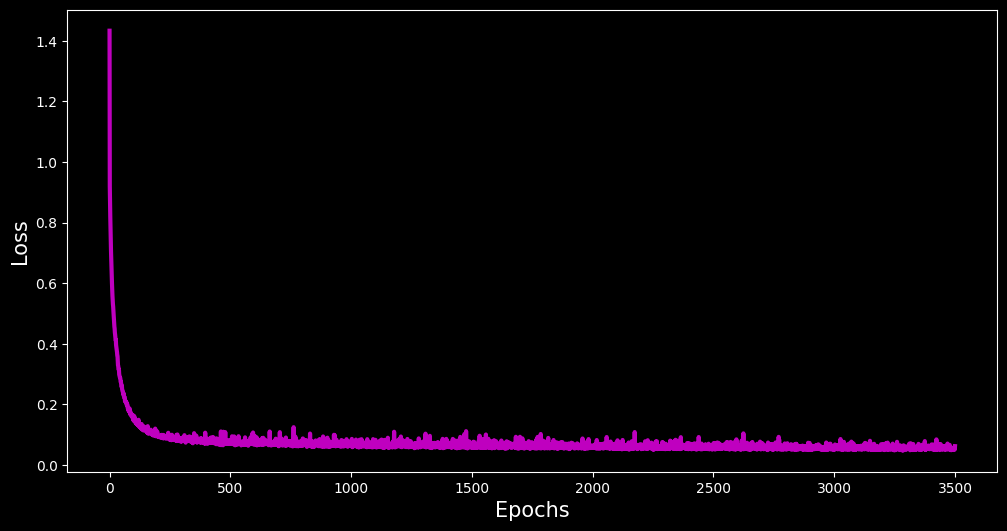

In [14]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

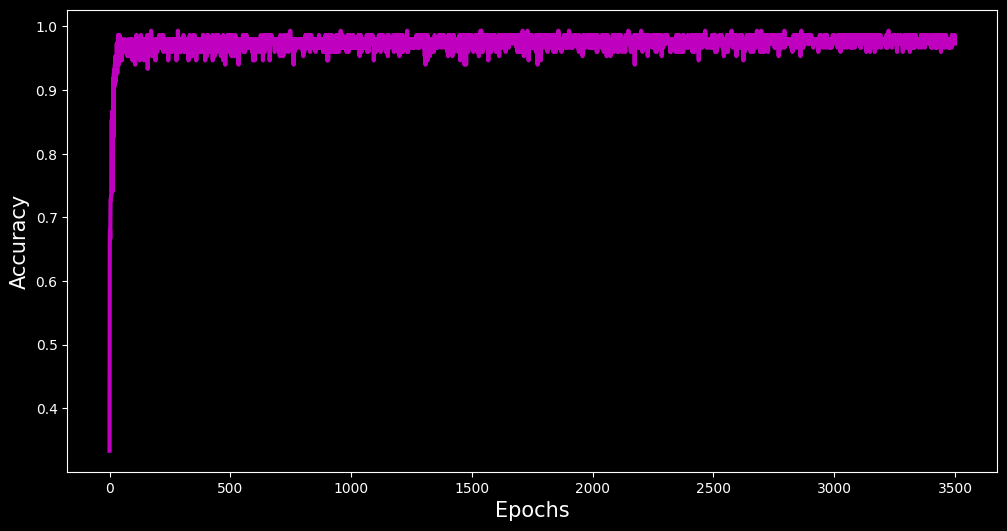

In [15]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['accuracy'],'m', lw = 3, label= 'Training Accuracy')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Accuracy', fontsize = 15)
plt.show()

In [16]:
print("% Accuracy : ", np.round(hist.history['accuracy'][-1] * 100))

% Accuracy :  97.0


# Design Smoothing Filter

In [17]:
def smooth(x, k = 9):
    return np.convolve(x, (1/k)*np.ones(3), mode = 'valid')

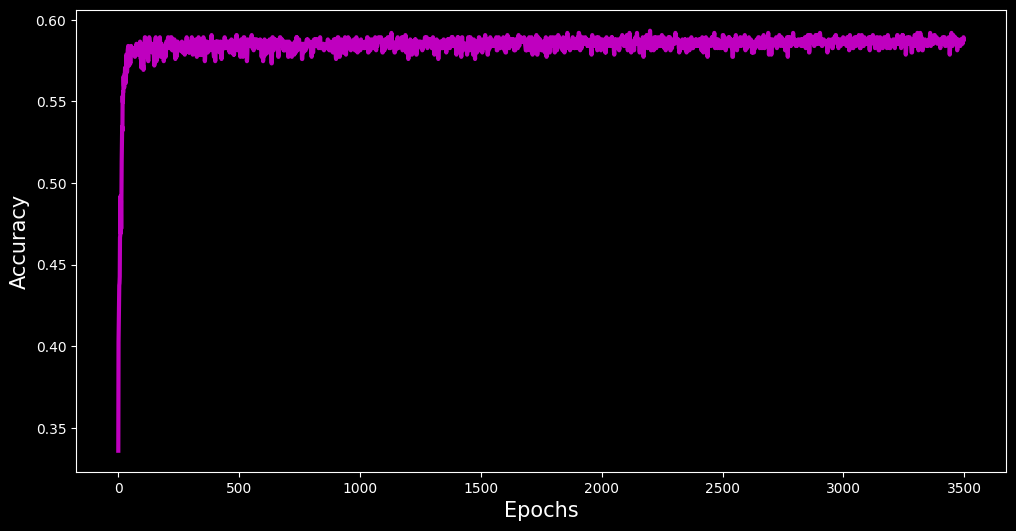

In [18]:
plt.figure(figsize =(12,6))
plt.plot(smooth(hist.history['accuracy'], 5),'m', lw = 3, label= 'Training Accuracy')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Accuracy', fontsize = 15)
plt.show()